In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.mnist

In [6]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [7]:
train_labels[0]

5

In [8]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

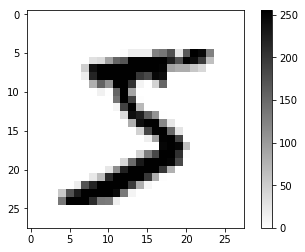

In [9]:
plt.figure()
plt.imshow(train_images[0],plt.cm.binary) #change 0 to sny number
plt.colorbar() # between 0 to 59999
plt.grid(False)

In [10]:
#NORMALIZATION
train_images = train_images/255.0
test_images = test_images/255.0

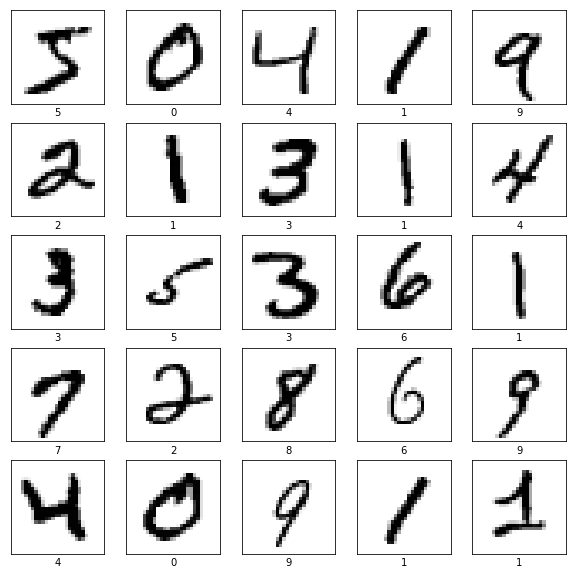

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(train_labels[i])

In [12]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(10,activation=tf.nn.softmax)])



In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph', 
                                          histogram_freq=0,
                                            write_graph=True, 
                                          write_images=True)

In [14]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.fit(train_images,train_labels,epochs=20,
          callbacks=[tb_callback],
        validation_data=[test_images,test_labels])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.2071 - acc: 0.9381 - val_loss: 0.1099 - val_acc: 0.9667
Epoch 2/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0848 - acc: 0.9732 - val_loss: 0.0760 - val_acc: 0.9754
Epoch 3/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0597 - acc: 0.9813 - val_loss: 0.0846 - val_acc: 0.9739
Epoch 4/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0439 - acc: 0.9866 - val_loss: 0.0776 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0349 - acc: 0.9884 - val_loss: 0.0865 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0289 - acc: 0.9902 - val_loss: 0.0771 - val_acc: 0.9803
Epoch 7/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.0228 - acc: 0.9919 - val_loss: 0.